## 911 Project - Kaggle Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [28]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Hour         99492 non-null  int64         
 10  Month        99492 non-null  int64         
 11  Day of Week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 9.1+ MB


In [29]:
df.columns

Index([&#39;lat&#39;, &#39;lng&#39;, &#39;desc&#39;, &#39;zip&#39;, &#39;title&#39;, &#39;timeStamp&#39;, &#39;twp&#39;, &#39;addr&#39;, &#39;e&#39;,
       &#39;Hour&#39;, &#39;Month&#39;, &#39;Day of Week&#39;],
      dtype=&#39;object&#39;)

In [30]:
df.shape

(99492, 12)

#### Finding the top zip codes for the 911 calls

In [31]:
# top 5 zip calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Finding the top townships for the 911 calls

In [32]:
# top 5 townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Finding the total title unique codes in the dataset

In [33]:
# how many unique title codes
df['title'].unique()

array([&#39;EMS: BACK PAINS/INJURY&#39;, &#39;EMS: DIABETIC EMERGENCY&#39;,
       &#39;Fire: GAS-ODOR/LEAK&#39;, &#39;EMS: CARDIAC EMERGENCY&#39;, &#39;EMS: DIZZINESS&#39;,
       &#39;EMS: HEAD INJURY&#39;, &#39;EMS: NAUSEA/VOMITING&#39;,
       &#39;EMS: RESPIRATORY EMERGENCY&#39;, &#39;EMS: SYNCOPAL EPISODE&#39;,
       &#39;Traffic: VEHICLE ACCIDENT -&#39;, &#39;EMS: VEHICLE ACCIDENT&#39;,
       &#39;Traffic: DISABLED VEHICLE -&#39;, &#39;Fire: APPLIANCE FIRE&#39;,
       &#39;EMS: GENERAL WEAKNESS&#39;, &#39;Fire: CARBON MONOXIDE DETECTOR&#39;,
       &#39;EMS: UNKNOWN MEDICAL EMERGENCY&#39;, &#39;EMS: UNRESPONSIVE SUBJECT&#39;,
       &#39;Fire: VEHICLE ACCIDENT&#39;, &#39;EMS: ALTERED MENTAL STATUS&#39;,
       &#39;Fire: FIRE ALARM&#39;, &#39;EMS: CVA/STROKE&#39;,
       &#39;Traffic: ROAD OBSTRUCTION -&#39;, &#39;EMS: SUBJECT IN PAIN&#39;,
       &#39;EMS: HEMORRHAGING&#39;, &#39;EMS: FALL VICTIM&#39;, &#39;EMS: ASSAULT VICTIM&#39;,
       &#39;EMS: SEIZURES&#39;, &#39;EMS: 

In [34]:
df['title'].nunique()

110

In [35]:
# total counts using unique
len(df['title'].unique())

110

#### Finding the common reason for the call

In [36]:
x = df['title'].iloc[0]
x.split(':')[0]

&#39;EMS&#39;

In [37]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [38]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Plotting reasons with seaborn

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a91cfb3370&gt;

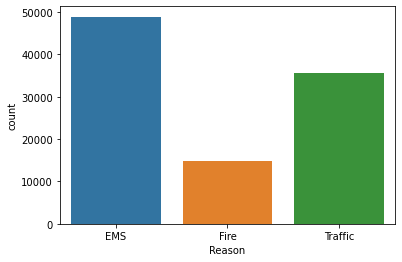

In [39]:
sns.countplot(x='Reason', data=df)

In [40]:
df.dtypes

lat                   float64
lng                   float64
desc                   object
zip                   float64
title                  object
timeStamp      datetime64[ns]
twp                    object
addr                   object
e                       int64
Hour                    int64
Month                   int64
Day of Week            object
Reason                 object
dtype: object

#### Finding the type of timestamp

In [41]:
df['timeStamp'].iloc[0]

Timestamp(&#39;2015-12-10 17:40:00&#39;)

In [42]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Convert the column timestamp from string to timestamp type

In [43]:
#convert to pd_datetime
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [44]:
df.dtypes

lat                   float64
lng                   float64
desc                   object
zip                   float64
title                  object
timeStamp      datetime64[ns]
twp                    object
addr                   object
e                       int64
Hour                    int64
Month                   int64
Day of Week            object
Reason                 object
dtype: object

In [45]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [46]:
time

Timestamp(&#39;2015-12-10 17:40:00&#39;)

In [47]:
time.day

10

In [48]:
time.date()

datetime.date(2015, 12, 10)

In [49]:
time.dayofweek

3

In [50]:
time.month

12

In [51]:
time.month_name()

&#39;December&#39;

#### creating new columns - Hour , Month and Day_of_the_Week

In [52]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [53]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [54]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [55]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [56]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [57]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3,EMS


#### above Day of the week is number, map them to below dictionary

In [58]:
dmap={
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun',
}

In [59]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [60]:
df['Day of Week']

0        Thur
1        Thur
2        Thur
3        Thur
4        Thur
         ... 
99487     Wed
99488     Wed
99489     Wed
99490     Wed
99491     Wed
Name: Day of Week, Length: 99492, dtype: object

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thur,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thur,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thur,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thur,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thur,EMS


&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a9247b9c70&gt;

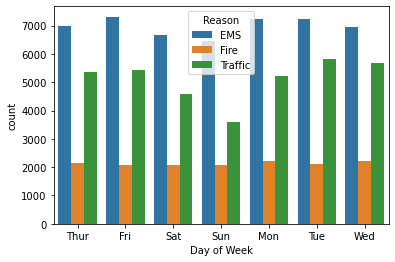

In [62]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

&lt;matplotlib.legend.Legend at 0x2a9247a52e0&gt;

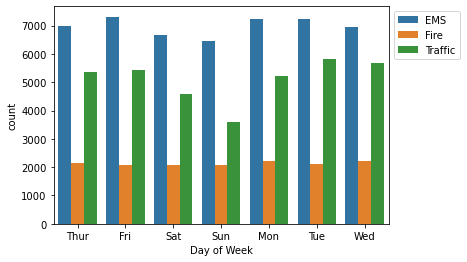

In [63]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1,1))

&lt;matplotlib.legend.Legend at 0x2a9247a5a60&gt;

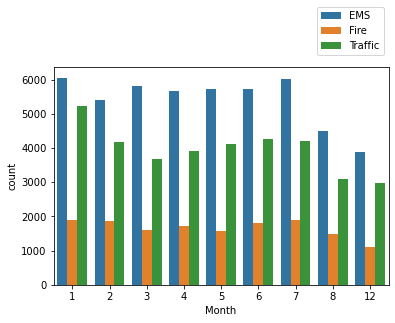

In [64]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1,1.3))

#### above missing months 9,10,11

In [65]:
df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [66]:
bymonth = df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a9235c3700&gt;

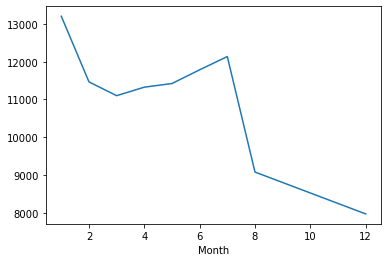

In [67]:
bymonth['lat'].plot()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a923739c40&gt;

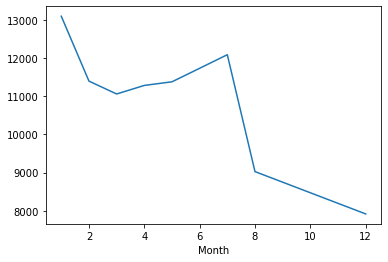

In [70]:
bymonth['addr'].plot()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a9282d1df0&gt;

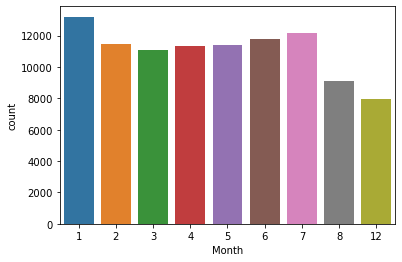

In [72]:
# check the drop the month 8 to month 12
sns.countplot(x='Month', data=df)

In [74]:
# this creates a month as a new column, used in the next cell
bymonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week,Reason
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


&lt;seaborn.axisgrid.FacetGrid at 0x2a927b5ab50&gt;

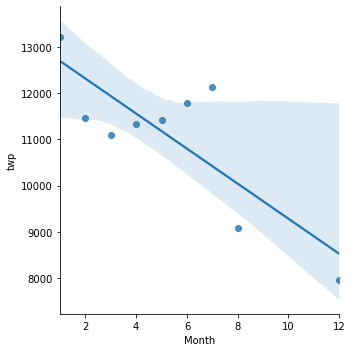

In [75]:
#lmplot
# data = reset_index because month is NOT a column in bymonth df

sns.lmplot(x='Month', y='twp', data=bymonth.reset_index())

In [76]:
#creata a new column date from date timestamp column
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [77]:
t = df['timeStamp'].iloc[0]
t

Timestamp(&#39;2015-12-10 17:40:00&#39;)

In [78]:
t.date()

datetime.date(2015, 12, 10)

In [79]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thur,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thur,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thur,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thur,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thur,EMS,2015-12-10


In [81]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


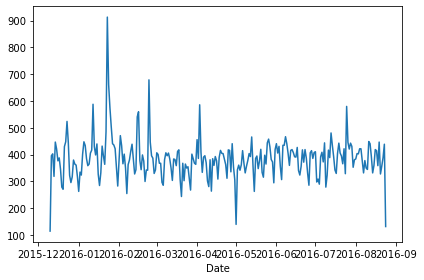

In [82]:
# calls plot according to the month
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

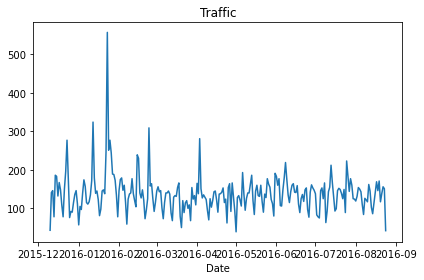

In [83]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

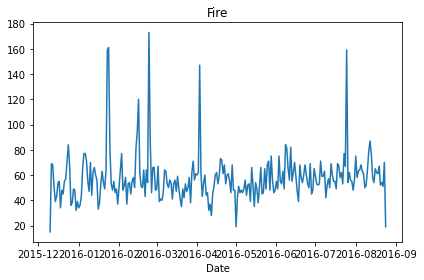

In [84]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

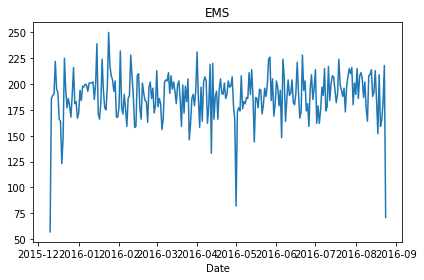

In [85]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [86]:
# creating a matrix of hour and Day of the week for heatmap
df.groupby(by=['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Month  Reason  Date  
Day of Week Hour                       
Fri         0       275     275   275  
            1       235     235   235  
            2       191     191   191  
            3       175     175   175  
            4       201     201   201  
...                 ...     ...   ...  
Wed         19      686     686   686  
            20      668     668   668  
            21      575     575   575  
            22      490     490   490  
            23      335     335   335  

[168 rows x 12 columns]

In [87]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [88]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a927d60dc0&gt;

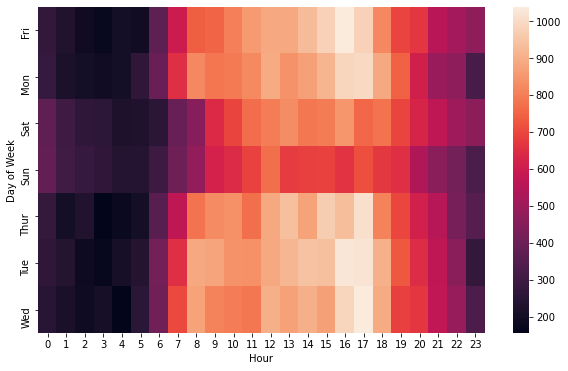

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a9293cf2b0&gt;

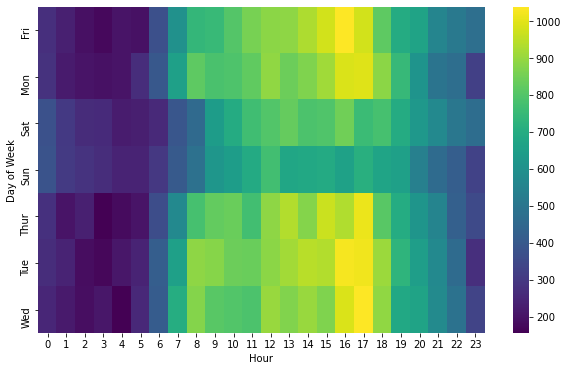

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour, cmap='viridis')

&lt;seaborn.matrix.ClusterGrid at 0x2a92920fb80&gt;

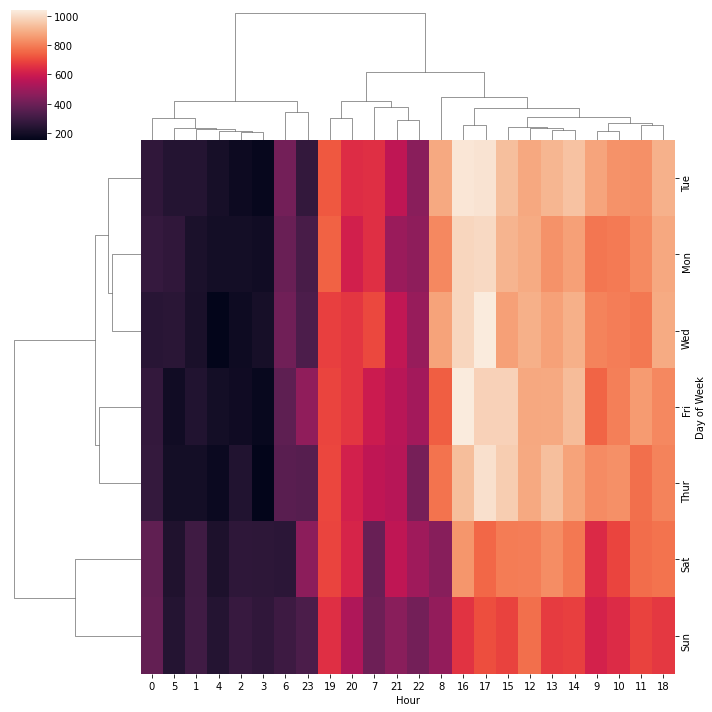

In [91]:
#clustermap
sns.clustermap(dayHour)

In [92]:
#heatmap for month and day of the week
df.groupby(by=['Day of Week','Month']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Month                                                               
Fri         1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         5      1538  1538  1538  1350   1538       1538  1538  1533  1538   
            6      2058  2058  2058  1794   2058       2058  2054  2046  2058   
            7      1717  1717  1717  1504   1717       1717  1715  1711  1717   
            8      1295  1295  1295  1106   1295       1295  1295  1287  1295   
            12     1262  1262  1262  1081   1262       1262  1260  1249  1262   

                   Hour  Reason  Date  
Day of Week Month                      
Fri         1      1970    1970  1970  
            2      1581    1581  1581  
            3      1525    1525  1525  
            4      1958    1958  1958  
            5      1730    1730  1730  
...                 ...     ...   ...  
Wed         5      1538    1538  1538  
            6      2058    2058  2058  
            7      1717    1717  1717  
            8      1295    1295  1295  
            12     1262    1262  1262  

[63 rows x 12 columns]

In [93]:
df.groupby(by=['Day of Week','Month']).count()['Reason']

Day of Week  Month
Fri          1        1970
             2        1581
             3        1525
             4        1958
             5        1730
                      ... 
Wed          5        1538
             6        2058
             7        1717
             8        1295
             12       1262
Name: Reason, Length: 63, dtype: int64

In [94]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


&lt;matplotlib.axes._subplots.AxesSubplot at 0x2a9292e1d00&gt;

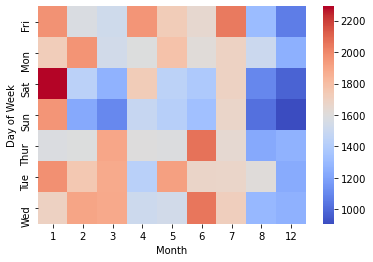

In [95]:
sns.heatmap(dayMonth, cmap='coolwarm')

&lt;seaborn.matrix.ClusterGrid at 0x2a92919b6d0&gt;

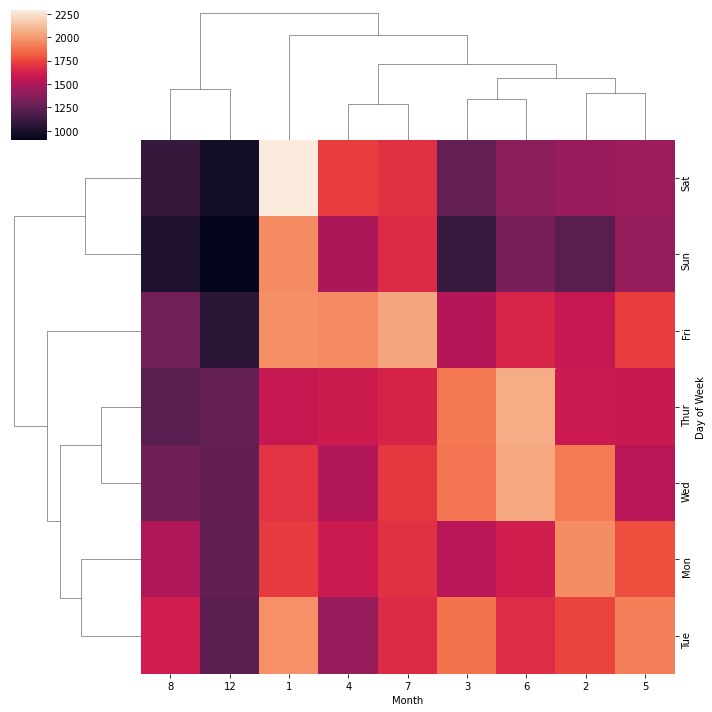

In [96]:
sns.clustermap(dayMonth)